# Convolution

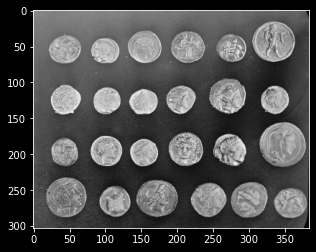

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

image = data.coins()
plt.imshow(image, cmap="gray")

In [26]:
k_edge = np.array((
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]),
    dtype='int')
k_gauss = np.array((
    [1, 4, 1],
    [4, 9, 4],
    [1, 4, 1]),
    dtype='int') / 29
k_sobel_x = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]),
    dtype="int")
k_sobel_y = np.array((
    [ 1,  2,  1],
    [ 0,  0,  0],
    [-1, -2, -1]),
    dtype="int")

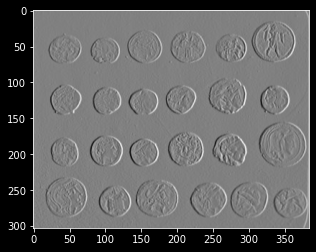

In [29]:
from scipy.signal import convolve2d
image_x = convolve2d(image, k_sobel_x, mode="same")
plt.imshow(image_x, cmap="gray")

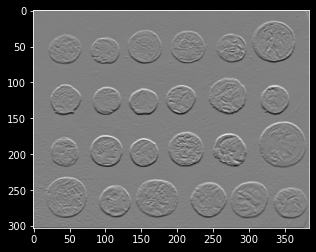

In [30]:
image_y = convolve2d(image, k_sobel_y, mode="same")
plt.imshow(image_y, cmap="gray")

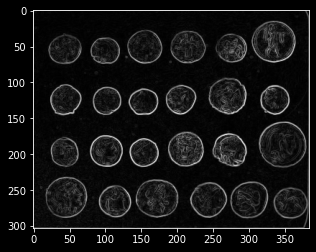

In [32]:
img_edge = (image_y ** 2 + image_x ** 2) ** .5
plt.imshow(img_edge, cmap="gray")

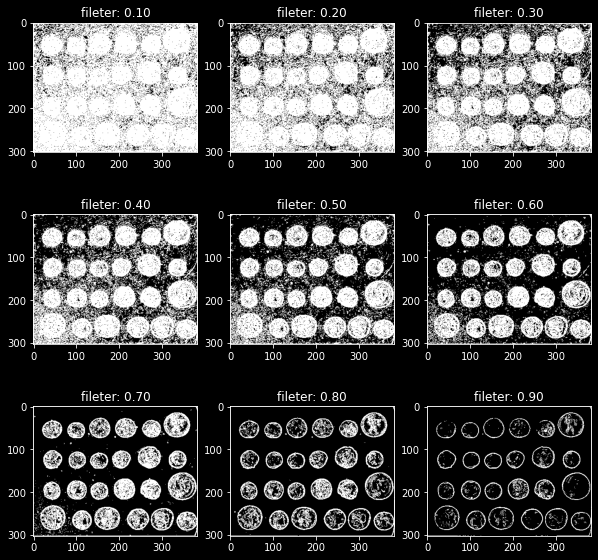

In [41]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
i = 0.1
for r in range(3):
    for c in range(3):
        axs[r, c].imshow(img_edge > np.quantile(img_edge, i), cmap="gray")
        axs[r, c].set_title("fileter: %.2f" % i)
        i += 0.1

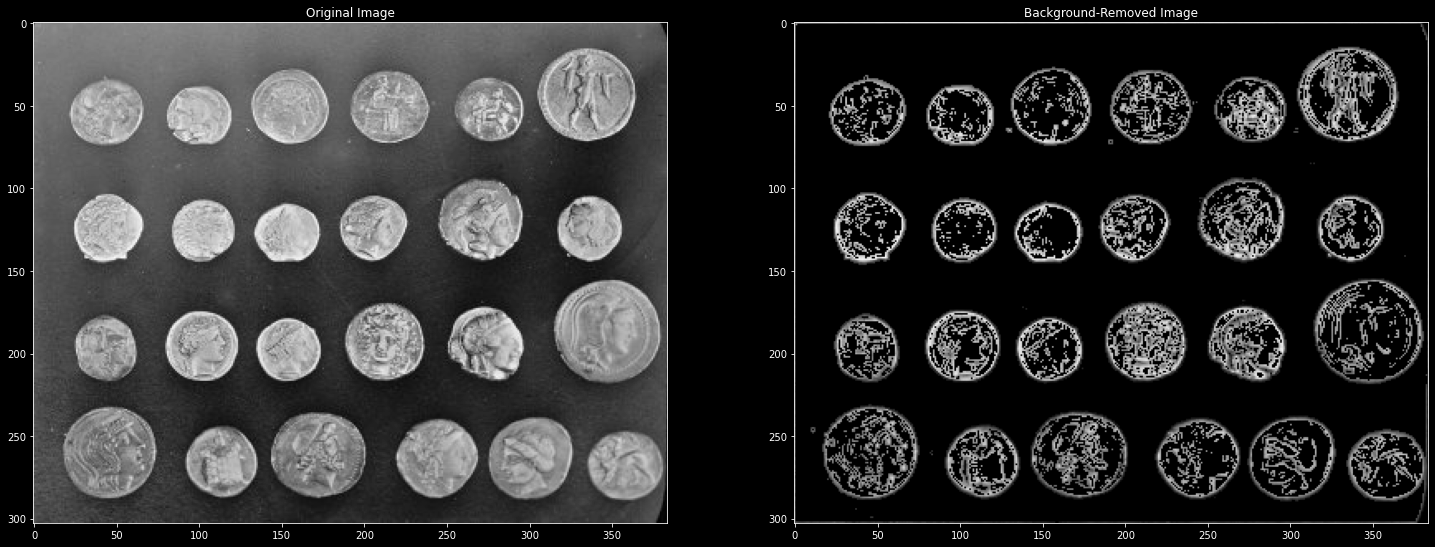

In [46]:
mask = img_edge > np.quantile(img_edge, 0.8)
new_image = np.zeros(image.shape)
new_image[mask] = image[mask]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 15))
axes[0].imshow(image, cmap="gray")
axes[0].title.set_text("Original Image")
axes[1].imshow(new_image, cmap="gray")
axes[1].title.set_text("Edge-Detected Image")